# <a>COVID 19 Data Analysis And EDA Till 27 Apr 2020</a>

In [120]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-darkgrid')

%matplotlib inline

In [121]:
statewise_list_df = pd.read_csv("covid_19_india.csv")

In [122]:
statewise_list_df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [123]:
statewise_list_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 9 columns):
Sno                         1350 non-null int64
Date                        1350 non-null object
Time                        1350 non-null object
State/UnionTerritory        1350 non-null object
ConfirmedIndianNational     1350 non-null object
ConfirmedForeignNational    1350 non-null object
Cured                       1350 non-null int64
Deaths                      1350 non-null int64
Confirmed                   1350 non-null int64
dtypes: int64(4), object(5)
memory usage: 95.0+ KB


In [124]:
statewise_list_df['Date'] = pd.to_datetime(statewise_list_df['Date'], format ='%d/%m/%y')
statewise_list_df =  statewise_list_df.drop(['Sno','ConfirmedIndianNational', 'ConfirmedForeignNational', 'Time'], axis =1)

In [125]:
statewise_list_df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [126]:
statewise_list_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 5 columns):
Date                    1350 non-null datetime64[ns]
State/UnionTerritory    1350 non-null object
Cured                   1350 non-null int64
Deaths                  1350 non-null int64
Confirmed               1350 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 52.8+ KB


In [127]:
# Overall Analysis - India Level

In [128]:
overall_cases_df = statewise_list_df[['Date','Confirmed', 'Cured', 'Deaths']].groupby('Date').sum().reset_index()

In [129]:
overall_cases_df.tail()

,Date,Confirmed,Cured,Deaths
83,2020-04-22,20471,3960,652
84,2020-04-23,21700,4325,686
85,2020-04-24,23452,4814,723
86,2020-04-25,24893,5210,779
87,2020-04-26,26605,5914,826


In [130]:
# Active Cases  = TotalCase - (Cured + Deaths)
overall_cases_df['Active_cases'] = overall_cases_df['Confirmed'] - (overall_cases_df['Cured'] + overall_cases_df['Deaths'])

In [131]:
def get_daily_report(critrion, df):
    daily_case_series =[]
    df_length = len(df)
    for i in range(df_length):
        if i==0:
            daily_case_series.append(df[critrion].iloc[i])
        else:
            daily_case_series.append(df[critrion].iloc[i] - df[critrion].iloc[i-1])
    return daily_case_series

In [132]:
overall_cases_df['Daily_cases'] = get_daily_report(critrion = 'Confirmed', df = overall_cases_df)
overall_cases_df['Daily_cured'] = get_daily_report(critrion = 'Cured', df = overall_cases_df)
overall_cases_df['Daily_deaths'] = get_daily_report(critrion = 'Deaths', df = overall_cases_df)

In [219]:
overall_cases_df['Deaths%'] = round((overall_cases_df['Deaths']/(overall_cases_df['Cured']+ overall_cases_df['Deaths']))*100,2)
overall_cases_df['Cured%'] = round((overall_cases_df['Cured']/(overall_cases_df['Cured']+ overall_cases_df['Deaths']))*100,2)
overall_cases_df['Growth%'] = round((overall_cases_df['Daily_cases']/(overall_cases_df['Active_cases']))*100,2)


In [220]:
overall_cases_df.tail()

,Date,Confirmed,Cured,Deaths,Active_cases,Daily_cases,Daily_cured,Daily_deaths,Deaths%,Cured%,Growth%
83,2020-04-22,20471,3960,652,15859,1486,700,49,14.14,85.86,9.37
84,2020-04-23,21700,4325,686,16689,1229,365,34,13.69,86.31,7.36
85,2020-04-24,23452,4814,723,17915,1752,489,37,13.06,86.94,9.78
86,2020-04-25,24893,5210,779,18904,1441,396,56,13.01,86.99,7.62
87,2020-04-26,26605,5914,826,19865,1712,704,47,12.26,87.74,8.62


In [134]:
#overall_cases_df['Date'] = overall_cases_df['Date'].dt.strftime('%d-%b')
overall_cases_df.head()

,Date,Confirmed,Cured,Deaths,Active_cases,Daily_cases,Daily_cured,Daily_deaths
0,2020-01-30,1,0,0,1,1,0,0
1,2020-01-31,1,0,0,1,0,0,0
2,2020-02-01,2,0,0,2,1,0,0
3,2020-02-02,3,0,0,3,1,0,0
4,2020-02-03,3,0,0,3,0,0,0


In [135]:
overall_cases_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 8 columns):
Date            88 non-null datetime64[ns]
Confirmed       88 non-null int64
Cured           88 non-null int64
Deaths          88 non-null int64
Active_cases    88 non-null int64
Daily_cases     88 non-null int64
Daily_cured     88 non-null int64
Daily_deaths    88 non-null int64
dtypes: datetime64[ns](1), int64(7)
memory usage: 5.6 KB


In [148]:
def plot_bargraph(x_axis, y_axis, title):

    f, (ax1) = plt.subplots(1,1, figsize=(20,5))
    plt1 = sns.barplot(x= x_axis ,y=y_axis,
                   ax=ax1, color='grey',saturation=0.8)
    plt1.set_title(title, fontsize=25)
    plt.xticks(rotation =45)
    plt.show()

In [175]:
def plot_lineplot(x_axis, y_axis, title, y_scale= None):
    f, (ax1) = plt.subplots(1,1, figsize=(12,5))
    plt1 = sns.lineplot(x_axis, y_axis, ax=ax1)
    plt1.set_title(title, fontsize=15)
    plt.xticks(rotation =45)
    if y_scale != None:
        plt.yscale(y_scale)
    
    plt.show()

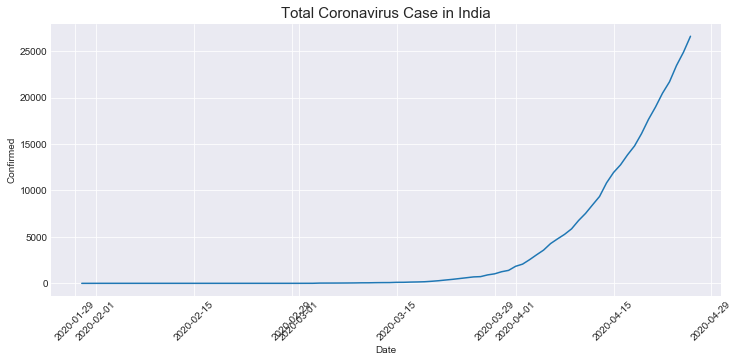

In [176]:
# Total Coronavirus cases in india

plot_lineplot(x_axis = overall_cases_df['Date'], 
              y_axis = overall_cases_df['Confirmed'],
              title = "Total Coronavirus Case in India")

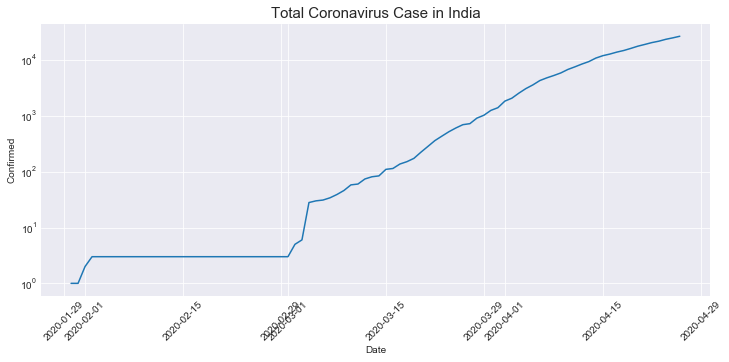

In [177]:
# total coronovirus cases in india - logarithmi
plot_lineplot(x_axis = overall_cases_df['Date'], 
              y_axis = overall_cases_df['Confirmed'],
              title = "Total Coronavirus Case in India",
               y_scale='log')


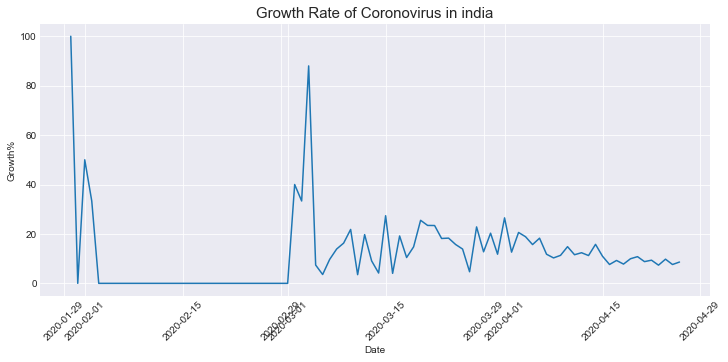

In [222]:
# Active Case in India
# total coronovirus cases in india - logarithmic
plot_lineplot(x_axis = overall_cases_df['Date'], 
              y_axis = overall_cases_df['Growth%'],
              title = "Growth Rate of Coronovirus in india")

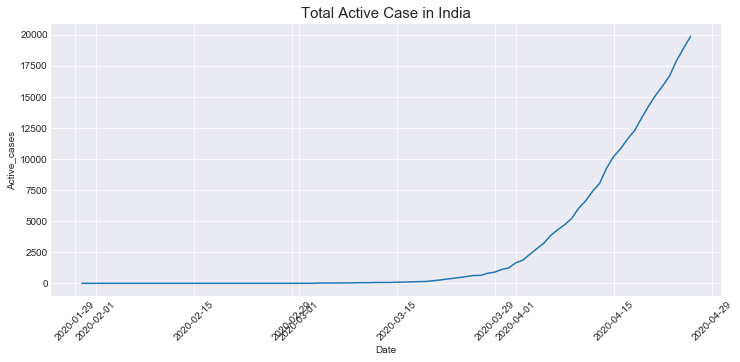

In [180]:
# Active Case in India
# total coronovirus cases in india - logarithmic
plot_lineplot(x_axis = overall_cases_df['Date'], 
              y_axis = overall_cases_df['Active_cases'],
              title = "Total Active Case in India")

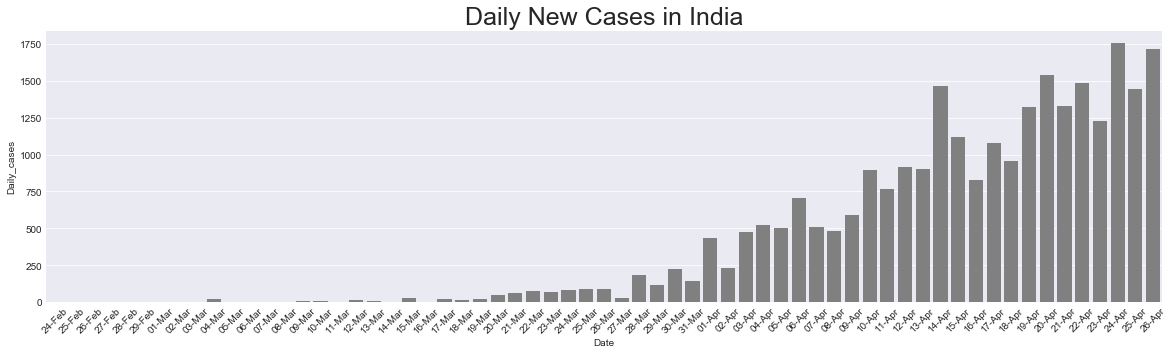

In [152]:
# Daily New Cases in India

plot_bargraph(overall_cases_df['Date'].loc[25:].dt.strftime('%d-%b'), 
              overall_cases_df['Daily_cases'].loc[25:], "Daily New Cases in India")

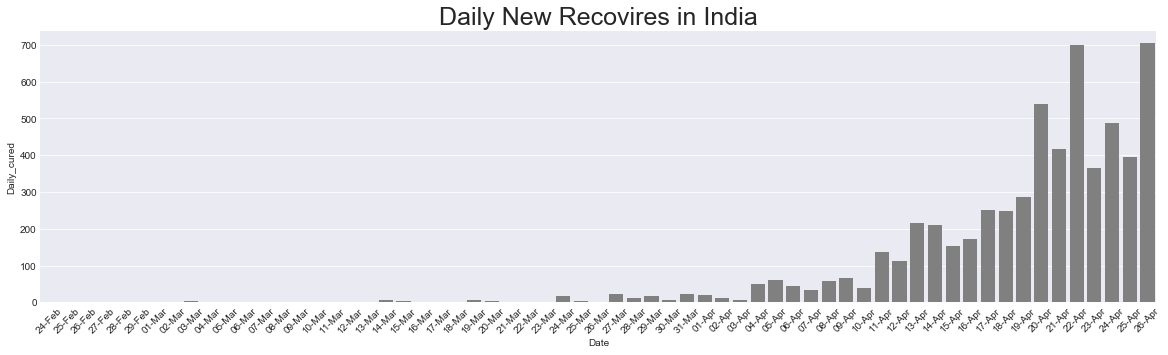

In [182]:
# Recovery  in india

plot_bargraph(overall_cases_df['Date'].loc[25:].dt.strftime('%d-%b'), 
              overall_cases_df['Daily_cured'].loc[25:], "Daily New Recovires in India")

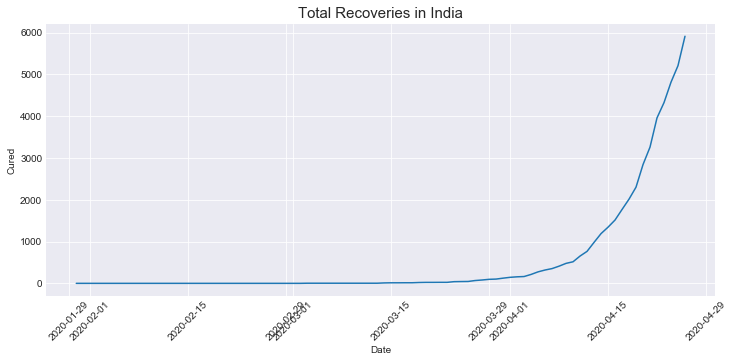

In [202]:
# Recovries 
plot_lineplot(x_axis = overall_cases_df['Date'], 
              y_axis = overall_cases_df['Cured'],
              title = "Total Recoveries in India")

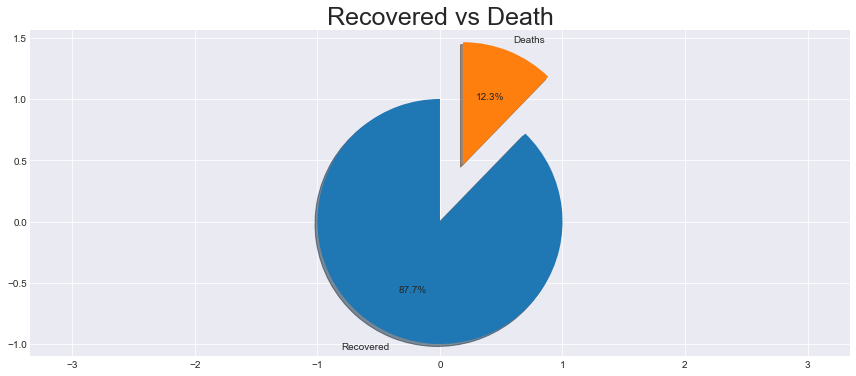

In [201]:
# Pie chart
labels = ['Recovered', 'Deaths']
sizes = [overall_cases_df['Cured'].max(), overall_cases_df['Deaths'].max()]


# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0.5)  
fig1, ax1 = plt.subplots(figsize=(12,5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, frame= True)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title("Recovered vs Death", fontsize=25)
plt.show()

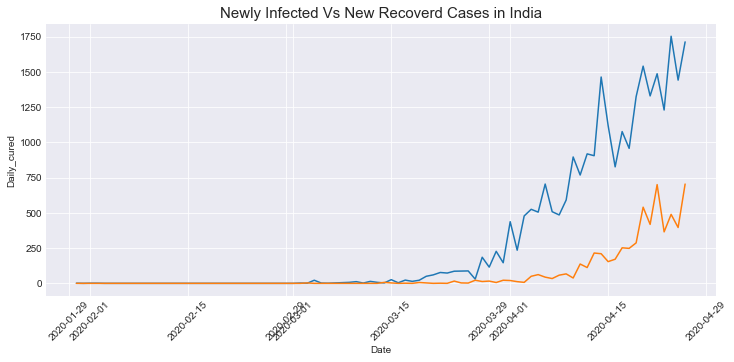

In [146]:
f, (ax1) = plt.subplots(1,1, figsize=(12,5))
plt1 = sns.lineplot(x= overall_cases_df['Date'] ,y=overall_cases_df['Daily_cases'], ax=ax1, palette=pal)
plt1 = sns.lineplot(x= overall_cases_df['Date'] ,y=overall_cases_df['Daily_cured'], ax=ax1, palette=pal)
plt1.set_title('Newly Infected Vs New Recoverd Cases in India', fontsize=15)
plt.xticks(rotation =45)
plt.show()


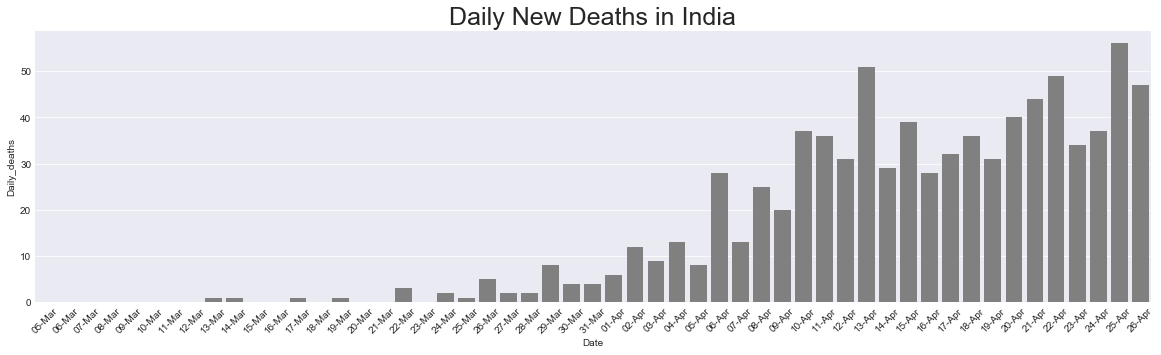

In [154]:
plot_bargraph(overall_cases_df['Date'].loc[35:].dt.strftime('%d-%b'), 
              overall_cases_df['Daily_deaths'].loc[35:], "Daily New Deaths in India" )

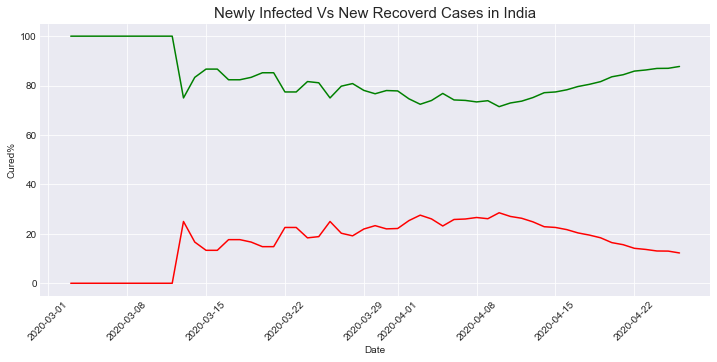

In [218]:
f, (ax1) = plt.subplots(1,1, figsize=(12,5))
plt1 = sns.lineplot(x= overall_cases_df['Date'] ,y=overall_cases_df['Deaths%'], ax=ax1, color='red')
plt1 = sns.lineplot(x= overall_cases_df['Date'] ,y=overall_cases_df['Cured%'], ax=ax1, color='green')
plt1.set_title('Recovery Rate Vs Death Rate in India', fontsize=15)
plt.xticks(rotation =45)
plt.show()